## DSF-PT07 : Group 6 Project Phase 2: KingsCounty Realtors Ltd. 

### Group Members:
1. Dennis Walubengo
2. Julian Kilyungi
3. Sharon Chebet
4. Nduku Kiteng'e 
5. Omara Waldea 

## Problem Statement:
For this project, the team will use regression modeling to analyze house sales in King county.

### The Data:
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names was also provided in column_names.md in the same folder.

### Business Problem:
The team was tasked with defining a stakeholder and business problem appropriate to this dataset.


## Proposed Solution:

### Business Understanding:

The group have used the following imagined scenario to develop the business case for this project: 
Group 6 is KingsCounty Realtors Ltd. A real estate agent dealing with properties in Kings County. The target audience of our modelling is household owners and potential buyers who are either looking to sell or buy a property in King County and would like to contract KingsCounty Realtors to support them with the service. 

This model and presentation seeks to review the following objectives:
1. Predicting the house prices 
2. Assessing the impact of house conditions and revonations on house grade
3. Understanding the impact of structural characteristics on house grade
4. Assessing neigbourhood influence on house prices

For the purpose of the project, the team used the data provided in kc_house_data.csv

The team followed the following process to achieve the above objectives and develop clear recommendations for the customer:
1. Data Understanding
2. Data Preparation
3. Modelling & Evaluation
4. Model limitations
4. Recommendations

Each section is shared below with the related code elements.
 



## Step 1: Data Understanding
To start the section, the team followed the following steps: 
1. Import the initial relevant libraries to support reading and interpretation of the data. 
2. Identify the contents of the dataset provided in order to deliberate on what possible uses the data could have in supporting the clients mentioned.
3. Convert the dataset into its numerical components and identified outliers and sum of null values in each column.
4. Carried out exploratory data analysis on the price. 
5. Review a correlation matrix of all the colums in the dataset. 
6. The team also created charts for the data to identify distribution, skewness of the data based on certain parameters.

The details for each are outlined in the code below.

In [87]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels as sm
from statsmodels.formula.api import ols 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings


warnings.filterwarnings('ignore')

In [88]:
#Loading the dataset
file_path = './data/kc_house_data.csv'
df = pd.read_csv(file_path)

In [89]:
# Checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [90]:
# checking the sum of the null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [91]:
# provides a summary of key statistical measures for each numeric column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [92]:
# Select only numerical columns for plotting
numerical_columns = df.select_dtypes(include=['number'])
# aggregate function that contains the minimum and maximum values for each numeric column
numerical_columns.agg(['min', 'max'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
min,1000102,78000.0,1,0.5,370,520,1.0,0.0,0.0,1,3,370,1900,0.0,98001,47.1559,-122.519,399,651
max,9900000190,7700000.0,33,8.0,13540,1651359,3.5,1.0,4.0,5,13,9410,2015,2015.0,98199,47.7776,-121.315,6210,871200


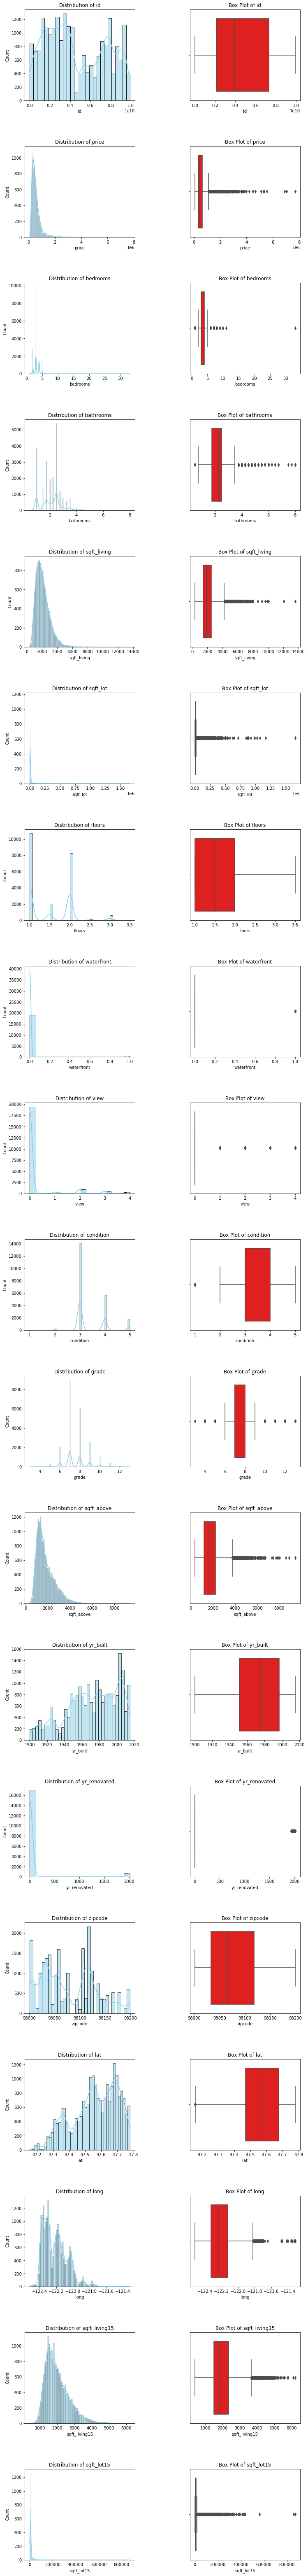

In [93]:
# Set up subplots for distribution plots
fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=2, figsize=(12, 6 * len(numerical_columns.columns)))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Create distribution plots (histograms or KDE plots)
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i, 0]
    
    sns.histplot(data=numerical_columns, x=column, kde=True, color='skyblue', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column}')

# Create box plots for presence of outliers
for i, column in enumerate(numerical_columns.columns):
    ax = axes[i, 1]
    
    sns.boxplot(data=numerical_columns, x=column, color='red', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_title(f'Box Plot of {column}')
plt.show()

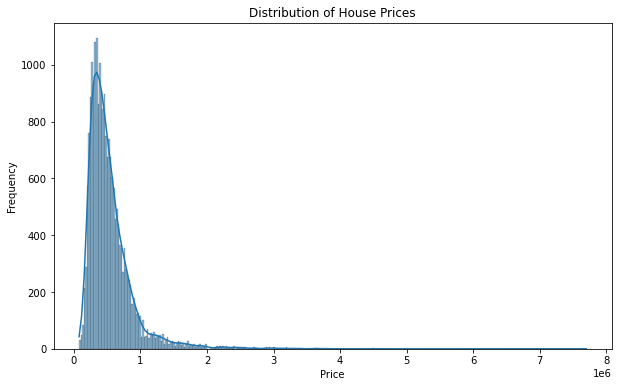

In [94]:
# Plot the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

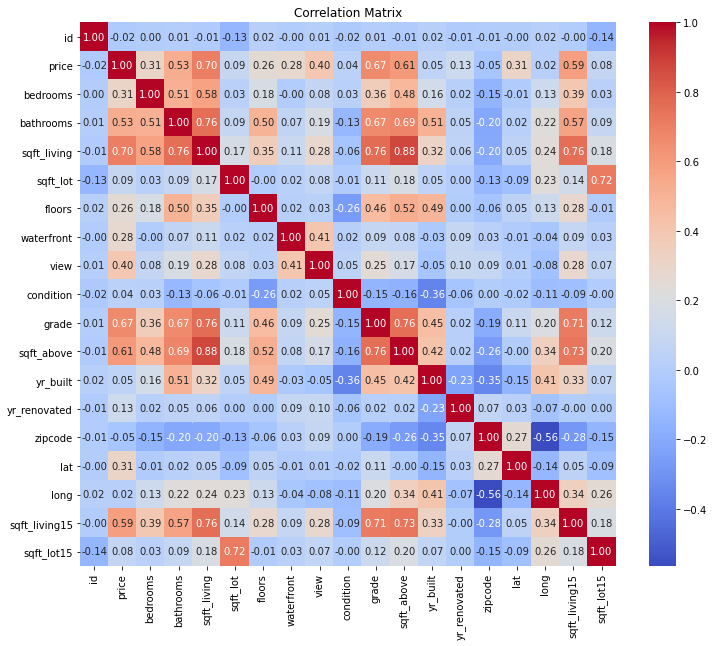

In [95]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Step 2: Data Preparation
### a. Data Cleaning: 
For this process, the data was reviewed to identify the level of cleanliness of the data. 
A few problems were identified in the data:
1. The date was listed as an integer and not date time format. 
2. Some fields were listed as objects which would make it difficult to review and interpret data. 
3. There were a large number of null values for some of the columns; namely: xx, xx and xx 
4. Checking for and removing multicollinearity (correlated predictors)*****

### b. Feature engineering:
The team then reviewed the data to identify the columns that would go to the model. The first step taken was to normalise the data by scaling the data set for numericals. 
The second step was to drop some of the columns for the dataset. 


In [96]:
# Correcting data types (example: converting date column to datetime)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [97]:
# Handle missing values
df['waterfront'].fillna(0, inplace=True)  # Assuming NaN means no waterfront
df['view'].fillna(0, inplace=True)        # Assuming NaN means no view
df['yr_renovated'].fillna(0, inplace=True)  # Assuming NaN means no renovation
df['sqft_basement'].fillna(0, inplace=True) # assuming Nan means no basement

In [98]:
# Convert date column to datetime
df['date']=pd. to_datetime (df['date'])

In [99]:
def remove_outliers(df, columns_to_check, outlier_threshold=1.5):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()
    
    for column in columns_to_check:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        # Remove outliers based on the bounds
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Example usage
columns_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']
outlier_threshold = 1.5
df_cleaned = remove_outliers(df, columns_to_check, outlier_threshold)

In [100]:
# Calculate summary statistics before removing outliers
summary_before = df[columns_to_check].describe()

# Remove outliers
df_cleaned = remove_outliers(df, columns_to_check, outlier_threshold)

# Calculate summary statistics after removing outliers
summary_after = df_cleaned[columns_to_check].describe()

print("Summary Statistics Before Removing Outliers:")
print(summary_before)

print("\nSummary Statistics After Removing Outliers:")
print(summary_after)

Summary Statistics Before Removing Outliers:
              price      bedrooms     bathrooms   sqft_living        floors
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000
mean   5.402966e+05      3.373200      2.115826   2080.321850      1.494096
std    3.673681e+05      0.926299      0.768984    918.106125      0.539683
min    7.800000e+04      1.000000      0.500000    370.000000      1.000000
25%    3.220000e+05      3.000000      1.750000   1430.000000      1.000000
50%    4.500000e+05      3.000000      2.250000   1910.000000      1.500000
75%    6.450000e+05      4.000000      2.500000   2550.000000      2.000000
max    7.700000e+06     33.000000      8.000000  13540.000000      3.500000

Summary Statistics After Removing Outliers:
              price      bedrooms     bathrooms   sqft_living        floors
count  1.964100e+04  19641.000000  19641.000000  19641.000000  19641.000000
mean   4.703665e+05      3.296421      2.025279   1932.664070      1.47082

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [102]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


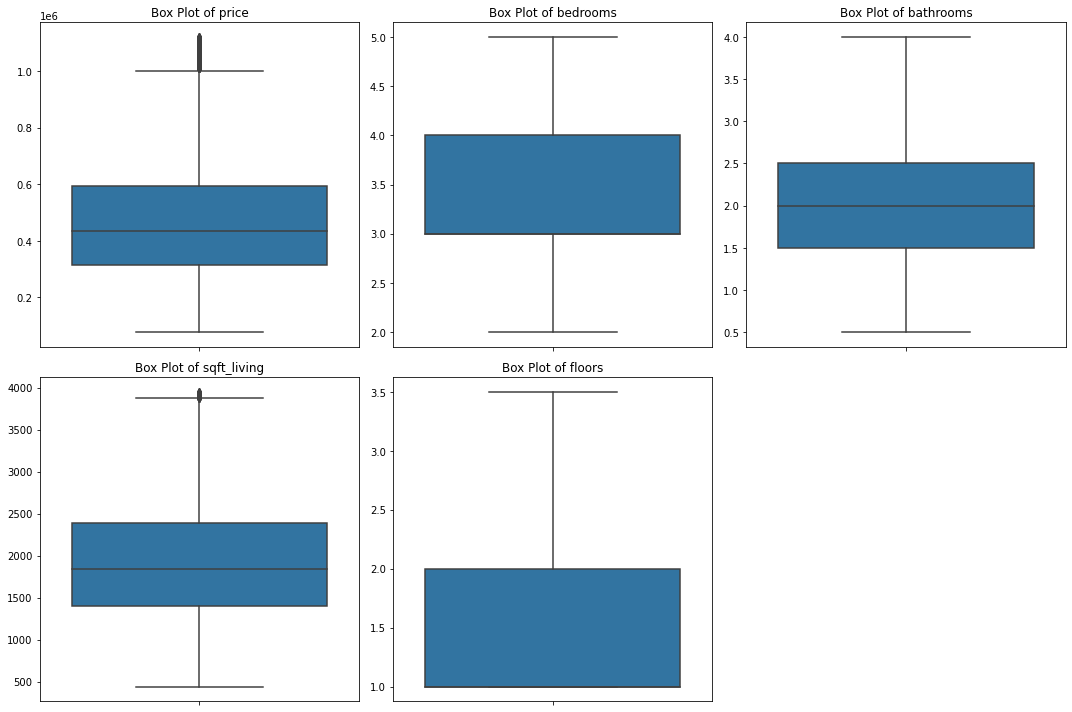

In [103]:
#Checking for outliers in the cleaned dataset using Box Plots
def plot_boxplots( df_cleaned ):
    num_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']
    num_plots = len(num_columns)
    ncols = 3
    nrows = (num_plots // ncols) + (num_plots % ncols > 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()

    for i, column in enumerate(num_columns):
        sns.boxplot(data= df_cleaned , y=column, ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Replace df with your actual DataFrame variable
plot_boxplots(df_cleaned)

In [104]:
# Adding important columns 
current_year = datetime.now().year #code from datetime library to create current period
df_cleaned['house_age'] = current_year - df_cleaned ['yr_built']
df_cleaned['years_since_last_renovation'] = current_year -   df_cleaned ['yr_renovated']
df_cleaned['years_since_last_renovation'] =  df_cleaned ['years_since_last_renovation'].apply(lambda x: x if x > 0 else 0)
df_cleaned .head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,years_since_last_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,69,2024.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,73,33.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,91,2024.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,59,2024.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,37,2024.0


In [105]:
#checking the columns
df_cleaned.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age',
       'years_since_last_renovation'],
      dtype='object')

## Feature Engineering

Normalization scales numerical features to a similar range, ensuring equal contribution in models and improving performance.

In [106]:
# Nomalize the  numerical columns data 
# Select only numerical columns for plotting
numerical_columns =df_cleaned.select_dtypes(include=['number']).columns
scaler =StandardScaler () # initialize the standard scaller
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])
print(numerical_columns)  # Ensure correct columns are selected


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age',
       'years_since_last_renovation'],
      dtype='object')


In [107]:
# Drop unnecessary columns
df2 = df_cleaned.drop(columns=['id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view', 'waterfront', 'condition', ])

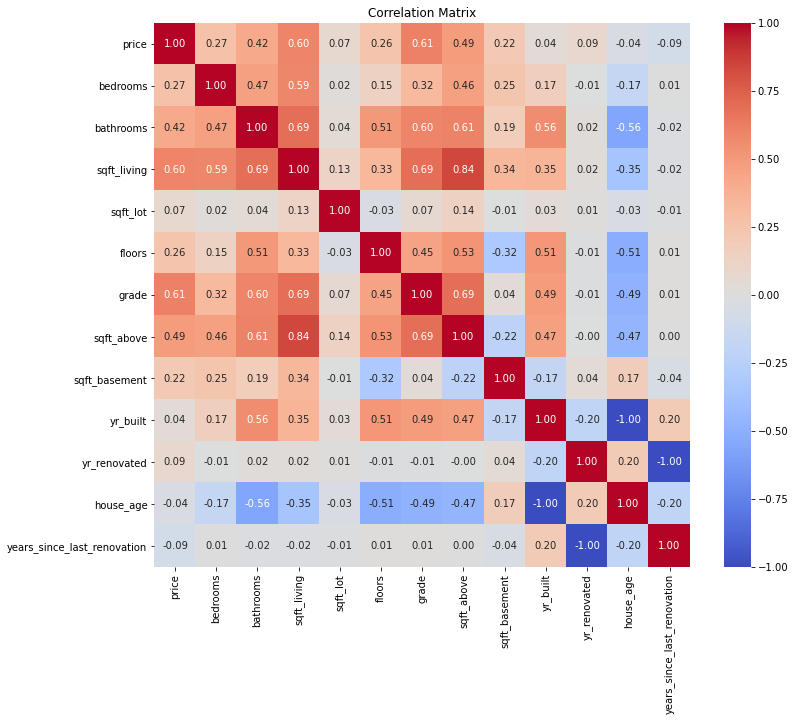

In [108]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Step 3: Modelling and Interpretation
In this section the team developed the following models to test out which one would give the outcomes that could address the customers issues. Each model highlights the objectives identified at the beginning. 
The following steps were followed in the modelling:
1. Create a linear regression model based on the objectives
2. Create and visualise the training model
3. Interpret the findings


## Model 1

Objective 1: Predicting House Prices

Purpose: To help buyers understand the factors that most influence house prices in Kings County, thereby making informed decisions on which properties to consider.

In [109]:
# Future Selection
# Selecting relevant features for regression modeling
# removed 'sqft_basement', because its an object shall review it
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','yr_built', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df_cleaned [selected_features]
y = df_cleaned['price']

In [110]:
#Model training
# Split the data into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state=42)
#Train a linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [111]:
# Model formulation and summary
formula = 'y~X'
model = ols(formula,df_cleaned).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2375.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:18:04   Log-Likelihood:                -16513.
No. Observations:               19641   AIC:                         3.306e+04
Df Residuals:                   19622   BIC:                         3.321e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.023e-15      0.004  -1.75e-12      1.000      -0.008       0.008
X[0]          -0.0493      0.005     -9.558      0.000      -0.059      -0.039
X[1]           0.0817      0.007     11.984      0.000       0.068       0.095
X[2]           0.2569      0.044      5.892      0.000       0.171       0.342
X[3]           0.0434      0.006      7.688      0.000       0.032       0.054
X[4]           0.0891      0.006     15.315      0.000       0.078       0.101
X[5]           0.0295      0.004      7.073      0.000       0.021       0.038
X[6]           0.0989      0.004     22.460      0.000       0.090       0.107
X[7]           0.0842      0.004     18.836      0.000       0.075       0.093
X[8]           0.3594      0.007     54.635      0.000       0.347       0.372
X[9]           0.0106      0.042      0.254      0.800      -0.071       0.093
X[10]          0.0115      0.024      0.479      0.632      -0.036       0.059
X[11]         -0.2652      0.006    -41.847      0.000      -0.278      -0.253
X[12]          0.0262      0.004      6.231      0.000       0.018       0.034
X[13]         -0.0619      0.005    -11.980      0.000      -0.072      -0.052
X[14]          0.3806      0.004     86.977      0.000       0.372       0.389
X[15]         -0.0344      0.005     -6.358      0.000      -0.045      -0.024
X[16]          0.1314      0.007     19.806      0.000       0.118       0.144
X[17]         -0.0172      0.006     -3.015      0.003      -0.028      -0.006
==============================================================================
Omnibus:                     1670.974   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3058.659
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       4.515   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3194708158711003
Mean Absolute Error: 0.42859831798785464
R-squared: 0.6836648580402584


In [113]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

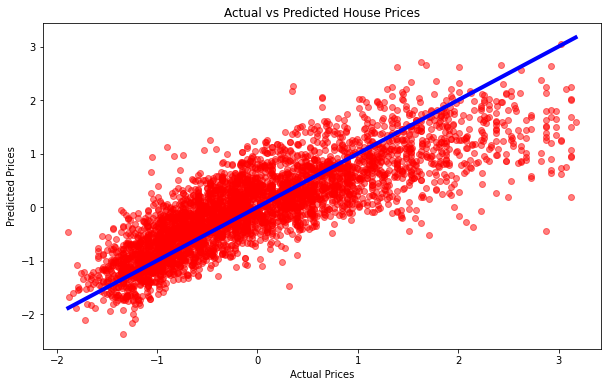

In [114]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## Interpretation  of findings

The linear regression model developed to predict house prices in Kings County shows a high level of explanatory power with an R-squared value of 0.700. This indicates that 70% of the variability in house prices can be explained by the 18 selected features. The model is statistically significant, with a very high F-statistic (2798) and a p-value of 0.00, signifying that the overall model is robust and the predictors are meaningful in explaining house prices. Additionally, the adjusted R-squared value remains at 0.700, reinforcing the model's strong fit.

Several key features significantly influence house prices, as indicated by their p-values and coefficients. For instance, sqft_living has a positive coefficient (102.832) and a p-value of 0.000, implying that an increase in the square footage of living space is associated with higher house prices. Similarly, waterfront (coefficient: 618,100) and grade (coefficient: 96,910) also have substantial positive impacts on house prices, highlighting that homes with waterfront views and higher grades are priced significantly higher. On the other hand, some features like sqft_basement and longitude have negative coefficients, indicating that larger basements and certain locations (eastward longitude) might negatively affect house prices.

## Model 2

Objective 2: Assessing the Impact of House Condition and Renovation on House Grade

Purpose: To inform homeowners about the significance of maintaining and renovating their homes in order to improve their grade, and to help buyers evaluate the quality of potential purchases based on these factors

In [115]:

# Future Selection
# Selecting relevant features for regression modeling

selected_features_2 = [ 'sqft_living', 'sqft_above','sqft_basement', 'bedrooms','bathrooms' , 'condition','yr_built','yr_renovated','price' ]

X2 = df_cleaned [selected_features_2]
y2 = df_cleaned['grade']

In [116]:
formula2 = 'y2~X2'
model2 = ols(formula2,df_cleaned).fit()
summary2 = model2.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     4241.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:18:04   Log-Likelihood:                -17265.
No. Observations:               19641   AIC:                         3.455e+04
Df Residuals:                   19631   BIC:                         3.463e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.038e-18      0.004  -1.45e-15      1.000      -0.008       0.008
X2[0]          0.2273      0.045      5.043      0.000       0.139       0.316
X2[1]          0.1708      0.043      3.956      0.000       0.086       0.255
X2[2]         -0.0240      0.025     -0.962      0.336      -0.073       0.025
X2[3]         -0.0685      0.005    -12.933      0.000      -0.079      -0.058
X2[4]          0.0521      0.007      7.695      0.000       0.039       0.065
X2[5]         -0.0301      0.005     -6.590      0.000      -0.039      -0.021
X2[6]          0.2824      0.006     46.713      0.000       0.271       0.294
X2[7]          0.0029      0.004      0.672      0.501      -0.006       0.011
X2[8]          0.3835      0.005     70.090      0.000       0.373       0.394
==============================================================================
Omnibus:                      201.821   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.856
Skew:                          -0.038   Prob(JB):                     2.62e-74
Kurtosis:                       3.639   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

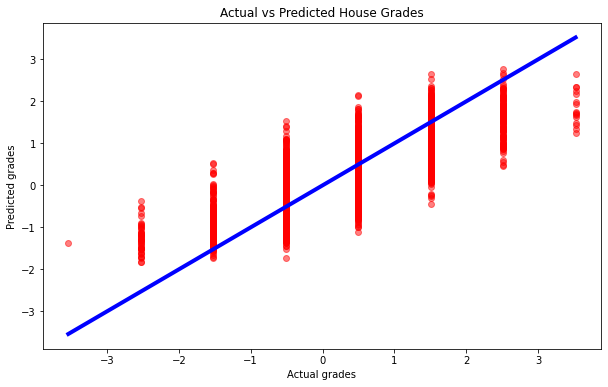

In [117]:
#Model training
# Split the data into training and testing datasets
X2_train,X2_test,y2_train,y2_test = train_test_split (X2,y2,test_size = 0.2,random_state=42)
#Train a linear regression model
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

# Predict on the test set
y2_pred = model2.predict(X2_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='red', alpha=0.5)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Grades')
plt.xlabel('Actual grades')
plt.ylabel('Predicted grades')
plt.show()


## Interpretation of findings

The linear regression model has an R-squared value of 0.705, indicating that 70.5% of the variability in house grades can be explained by the selected features. The model is statistically significant, as evidenced by the high F-statistic (5741) and a p-value of 0.00, demonstrating that the predictors collectively provide a good fit for the data.


sqft_living and sqft_above positively influence house grades, suggesting that increasing the living space and above-ground square footage can lead to higher grades.
The number of bathrooms has a significant positive impact, indicating that additional bathrooms enhance the property’s grade.
Interestingly, the number of bedrooms has a negative coefficient, which could imply that larger homes with more bedrooms may not always equate to better grades if the quality or functionality of space is compromised.
The year built positively impacts the grade, showing that newer homes tend to have higher grades.
The price variable (coefficient: 1.059e-06) is also significant, underscoring that higher-priced homes generally receive better grades.



## Model 3

Objective 3: Understanding the Impact of Structural Characteristics on House Grade

Purpose: To help buyers and sellers understand how various structural characteristics of a house influence its overall grade, thereby assisting in property valuation and improvement decisions.

In [118]:
#selected_features_3= ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'price', 'yr_built', 'yr_renovated','zipcode', 'sqft_living15', 'sqft_lot15']
selected_features_3= ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',  'yr_built', 'yr_renovated',]
X_3 = df_cleaned [selected_features_3]
y_3 = df_cleaned['grade']

formula3 = 'y_3~X_3'
model3 = ols(formula3,df_cleaned).fit()
summary3 = model3.summary()
summary3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_3   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2643.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:18:05   Log-Likelihood:                -19493.
No. Observations:               19641   AIC:                         3.901e+04
Df Residuals:                   19630   BIC:                         3.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.038e-18      0.005   -1.3e-15      1.000      -0.009       0.009
X_3[0]        -0.1192      0.006    -20.176      0.000      -0.131      -0.108
X_3[1]         0.0582      0.008      7.542      0.000       0.043       0.073
X_3[2]         0.5960      0.007     81.988      0.000       0.582       0.610
X_3[3]        -0.0135      0.005     -2.847      0.004      -0.023      -0.004
X_3[4]         0.1416      0.006     24.373      0.000       0.130       0.153
X_3[5]        -0.0205      0.005     -4.241      0.000      -0.030      -0.011
X_3[6]         0.0515      0.005     10.368      0.000       0.042       0.061
X_3[7]        -0.0140      0.005     -2.737      0.006      -0.024      -0.004
X_3[8]         0.1937      0.007     29.628      0.000       0.181       0.207
X_3[9]         0.0090      0.005      1.845      0.065      -0.001       0.019
==============================================================================
Omnibus:                      211.772   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.869
Skew:                           0.059   Prob(JB):                     2.37e-77
Kurtosis:                       3.646   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

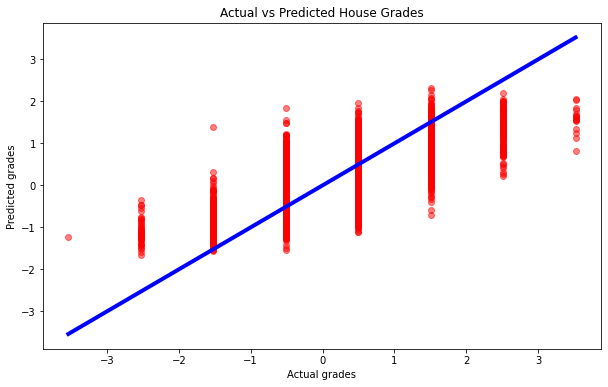

In [119]:
#Model training
# Split the data into training and testing datasets
X3_train,X3_test,y3_train,y3_test = train_test_split (X_3,y_3,test_size = 0.2,random_state=42)
#Train a linear regression model
model3 = LinearRegression()
model3.fit(X3_train,y3_train)

# Predict on the test set
y3_pred = model3.predict(X3_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y3_test, y3_pred, color='red', alpha=0.5)
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Grades')
plt.xlabel('Actual grades')
plt.ylabel('Predicted grades')
plt.show()

The linear regression model has an R-squared value of 0.658, indicating that 65.8% of the variability in house grades can be explained by the selected structural features. The model is statistically significant, with a high F-statistic (4147) and a p-value of 0.00, demonstrating that the predictors collectively provide a good fit for the data

The number of floors has the highest positive impact on house grades. Homes with more floors generally receive higher grades.
The square footage of living space also positively impacts house grades, highlighting the importance of ample and functional living areas.
More bathrooms positively influence house grades.
Interestingly, the number of bedrooms has a negative impact, suggesting that simply having more bedrooms does not necessarily lead to a higher grade.
The negative coefficient for waterfront properties indicates that not all waterfront homes are valued equally, potentially due to maintenance challenges or specific location factors.Newer homes tend to receive higher grades, indicating the value placed on modern construction and design standards.


## Model 4

Objective 4: Assessing Neighborhood Influence on House Prices

Purpose: To guide potential buyers on the significance of the neighborhood characteristics in the valuation of properties, thus influencing their choice of location.

In [120]:
# Feature Selection
# Selecting relevant features for regression modeling

selected_features_4 = ['zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15','grade']

X4 = df_cleaned [selected_features_4]
y4 = df_cleaned['price']

formula4 = 'y4~X4'
model4 = ols(formula,df_cleaned).fit()
summary4 = model4.summary()
summary4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     2375.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:18:05   Log-Likelihood:                -16513.
No. Observations:               19641   AIC:                         3.306e+04
Df Residuals:                   19622   BIC:                         3.321e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.023e-15      0.004  -1.75e-12      1.000      -0.008       0.008
X[0]          -0.0493      0.005     -9.558      0.000      -0.059      -0.039
X[1]           0.0817      0.007     11.984      0.000       0.068       0.095
X[2]           0.2569      0.044      5.892      0.000       0.171       0.342
X[3]           0.0434      0.006      7.688      0.000       0.032       0.054
X[4]           0.0891      0.006     15.315      0.000       0.078       0.101
X[5]           0.0295      0.004      7.073      0.000       0.021       0.038
X[6]           0.0989      0.004     22.460      0.000       0.090       0.107
X[7]           0.0842      0.004     18.836      0.000       0.075       0.093
X[8]           0.3594      0.007     54.635      0.000       0.347       0.372
X[9]           0.0106      0.042      0.254      0.800      -0.071       0.093
X[10]          0.0115      0.024      0.479      0.632      -0.036       0.059
X[11]         -0.2652      0.006    -41.847      0.000      -0.278      -0.253
X[12]          0.0262      0.004      6.231      0.000       0.018       0.034
X[13]         -0.0619      0.005    -11.980      0.000      -0.072      -0.052
X[14]          0.3806      0.004     86.977      0.000       0.372       0.389
X[15]         -0.0344      0.005     -6.358      0.000      -0.045      -0.024
X[16]          0.1314      0.007     19.806      0.000       0.118       0.144
X[17]         -0.0172      0.006     -3.015      0.003      -0.028      -0.006
==============================================================================
Omnibus:                     1670.974   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3058.659
Skew:                           0.600   Prob(JB):                         0.00
Kurtosis:                       4.515   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

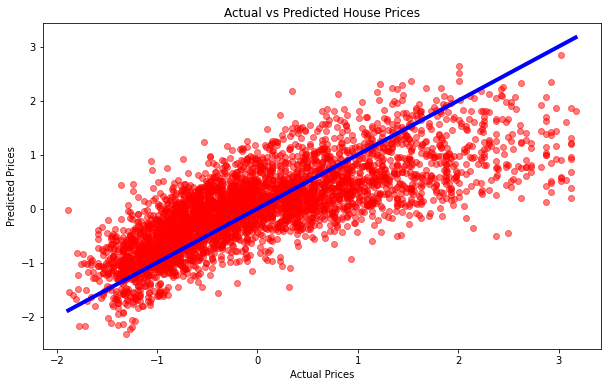

In [121]:
#Model training
# Split the data into training and testing datasets
X4_train,X4_test,y4_train,y4_test = train_test_split (X4,y4,test_size = 0.2,random_state=42)
#Train a linear regression model
model4 = LinearRegression()
model4.fit(X4_train,y4_train)

# Predict on the test set
y4_pred = model4.predict(X4_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y4_test, y4_pred, color='red', alpha=0.5)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], lw=4, color='blue')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## Interpretations of findings


The linear regression model has an R-squared value of 0.546, meaning that 54.6% of the variability in house prices can be explained by the selected neighborhood features. The model is statistically significant, with a high F-statistic (4325) and a p-value of 0.00, indicating a good fit for the data.

Higher latitudes are associated with higher house prices. This may be due to the desirable locations or specific characteristics of areas at higher latitudes within Kings County. Lower longitudes negatively impact house prices, suggesting that properties in areas with higher longitudes are less valued.
Larger average living spaces in a neighborhood significantly increase house prices. This highlights the importance of the neighborhood's overall residential quality.
Larger average lot sizes in a neighborhood also contribute to higher house prices, although the effect is less pronounced compared to living space.
The grade of a house is a strong predictor of its price. Higher grades lead to substantially higher prices, underscoring the importance of quality construction and finishes.


## Step 4: Model limitations
The following limitations were identified for the models generated:

1. Despite the model's robustness, there are some concerns about multicollinearity, as suggested by the large condition number. Multicollinearity can lead to inflated standard errors, making it harder to determine the true effect of individual predictors. 

2. While the model is robust, the non-normal distribution of residuals suggests potential outliers or non-linear relationships. Real estate professionals should use the model's predictions as one of several tools, combining them with qualitative insights and local market knowledge. Additionally, regular updates and recalibrations of the model are recommended to maintain its accuracy and relevance in changing market conditions

## Step 5: Recommendations
The following recommendations were proposed from the data:

1. Emphasize Key Features to Buyers and Sellers:

Given the strong influence of certain features on house prices, real estate agents should focus on these key aspects when advising clients. Emphasizing the importance of living space (sqft_living), house grade, and waterfront views can help buyers prioritize properties with these attributes, as they significantly increase house prices. Sellers can also benefit from understanding that investing in these areas can lead to higher returns.

2. Use Model Insights for Strategic Investments:

Real estate investors can leverage the model's insights to make strategic investments. Understanding that features like sqft_living, grade, and waterfront significantly increase prices, investors can prioritize properties with these attributes for higher returns. Additionally, considering renovations or improvements that enhance these features can be a strategic move to maximize property value.

3. Emphasize the Importance of Maintenance and Renovation:

The model shows that maintaining and renovating homes significantly impacts their grades. Features such as the year built (coefficient: 0.009) and year renovated (though not statistically significant in this model) are crucial. Homeowners should prioritize regular maintenance and consider timely renovations to improve or maintain their home’s grade, thereby increasing its market value and appeal.

4. Address Potential Negative Influences:

The analysis indicates that some structural characteristics might negatively affect house grades. For instance,  in model 3, the number of bedrooms (coefficient: -0.1458) and waterfront properties (coefficient: -0.2446) surprisingly have negative coefficients. This suggests that simply adding more bedrooms without considering overall space quality or certain waterfront properties might not always lead to higher grades. Buyers should carefully evaluate these aspects in relation to the overall property condition and other features.

5. Highlight the Importance of Location:

The regression analysis indicates that neighborhood characteristics significantly influence house prices. Factors like latitude (coefficient: 612,900) and longitude (coefficient: -426,900) show strong relationships with property prices. This suggests that properties located in certain areas (higher latitudes and lower longitudes) are valued more highly. Homebuyers should carefully consider the geographic location when evaluating properties, as it plays a crucial role in the overall value.

6. Emphasize the Impact of Nearby Property Sizes:

The square footage of living space (sqft_living15, coefficient: 151.75) and lot size (sqft_lot15, coefficient: 0.42) of neighboring properties also have a significant impact on house prices. Properties in neighborhoods with larger average living spaces and lot sizes tend to be more expensive. Buyers should assess the average property sizes in a neighborhood to gauge potential price appreciation, while sellers can leverage this information to set competitive prices.

7. Utilize Grade as a Key Selling Point:

The grade of a house (coefficient: 144,500) is a crucial determinant of its price. Higher-grade homes command significantly higher prices, indicating that buyers are willing to pay a premium for quality. Sellers should focus on maintaining or improving the grade of their homes to maximize their market value. Buyers should consider the grade as an indicator of overall quality and long-term value when making purchasing decisions.

